In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
np.set_printoptions(suppress=True)


In [63]:
datasetOriginal = pd.read_excel('AERO.xlsx')
print(datasetOriginal)

           RAD       Tmax    Hum rel  ...  Vel viento      EVAPO       Tmin
0    22.027872  28.500000  71.000000  ...    3.000000  151.97484  14.000000
1    25.037029  29.000000  67.000000  ...    3.000000  140.43913  13.300000
2    20.481812  28.400000  76.000000  ...    2.200000  144.14818  14.700000
3    18.375862  26.600000  84.000000  ...    2.200000  122.61914  14.500000
4    19.145055  27.300000  80.000000  ...    2.300000  135.94140  14.500000
..         ...        ...        ...  ...         ...        ...        ...
439  25.507501  28.512500  62.470588  ...    3.100000  154.81440  12.651515
440  27.896645  28.857576  65.771429  ...    2.865000  150.35900  12.252941
441  22.909966  27.720588  79.181818  ...    2.478947  142.27300  12.831429
442  19.909605  26.133333  84.142857  ...    2.284211  122.33750  12.785714
443  18.981342  25.791176  83.371429  ...    2.213636  121.21890  13.124242

[444 rows x 9 columns]


In [64]:


from sklearn import preprocessing
scaler= preprocessing.StandardScaler().fit(datasetOriginal)
dataset= scaler.transform(datasetOriginal)

X = dataset[:,0:3]
y = dataset[:,7]


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 12)
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(hidden_layer_sizes=(24,12,6),solver='sgd', activation='relu', 
                   random_state= 100, learning_rate_init=0.01)
                  

In [130]:
clf.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(24, 12, 6), learning_rate='constant',
             learning_rate_init=0.01, max_fun=15000, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=100, shuffle=True, solver='sgd', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [161]:
yhat = clf.predict(X_test)



In [162]:
#R^2
print(clf.score(X_test,y_test))

0.8400677302733834


In [163]:
media = scaler.mean_[7]

In [164]:
media

138.17826238738738

In [165]:
import math
scaler.var_
varianza = math.sqrt(scaler.var_[7])

In [166]:
# z = (x - u) / s
varianza

16.95700997605576

In [167]:
# x = z*s + u  

inversa = lambda x: varianza*x + media

In [168]:
nuevoYhat = inversa(yhat)

In [169]:
nuevoYhat

array([133.20210661, 113.26603229, 112.93408049, 111.15789394,
       129.79358762, 137.51085509, 133.98370379, 129.31948324,
       104.73664735, 157.47441043, 164.07574952, 115.86959066,
       154.27595876, 156.57965349, 137.78871118, 162.84316718,
       124.48750335, 155.06177407, 147.25325784, 128.73387121,
       120.36648155, 149.91016012, 126.3017597 , 142.2559548 ,
       157.86944423, 160.99236168, 136.94187915, 133.9034298 ,
       158.67989105, 152.96360114, 154.07718218, 111.47097637,
       132.34674734, 157.47441043, 143.63261445, 147.08516209,
       124.86608553, 130.75607629, 151.72614885, 126.21366986,
       108.59802265, 156.73470762, 152.99949205, 141.39726565,
       107.32113525, 150.69766772, 134.69037786, 143.95861125,
       131.6194365 , 133.90391375, 155.21951996, 135.24382222,
       146.90372334, 158.22033645, 166.02850929, 132.37294367,
       134.12480987, 159.20305641, 128.02689551, 147.87075159,
       129.93812753, 126.8612567 , 154.51633994, 127.94

In [170]:
nuevoYest =  inversa(y_test)

In [171]:
nuevoYest

array([122.2832 , 105.30671, 103.83346, 118.8526 , 131.8805 , 142.273  ,
       146.52751, 137.8072 ,  96.86734, 154.8144 , 159.0232 , 108.3947 ,
       158.42818, 165.8892 , 136.62118, 168.9163 , 125.1368 , 140.43913,
       147.22022, 142.7026 , 119.90788, 167.2232 , 133.5729 , 127.2054 ,
       159.09494, 164.0738 , 138.8326 , 122.4536 , 156.09832, 153.4958 ,
       160.3771 , 113.15069, 139.52439, 154.8144 , 142.9742 , 153.8279 ,
       128.49819, 129.448  , 158.8012 , 125.21484, 107.0772 , 155.72865,
       148.77329, 150.609  , 110.72665, 161.0947 , 116.6043 , 148.2623 ,
       123.8495 , 140.336  , 162.4958 , 138.47547, 151.97484, 171.9666 ,
       182.526  , 138.66512, 131.27174, 157.9598 , 124.37969, 146.529  ,
       124.1306 , 134.93126, 143.481  , 129.50658, 117.5429 , 130.0187 ,
       116.4591 , 105.27459, 127.14793, 110.2189 , 121.67377, 133.0884 ,
       144.25754, 133.88301, 154.07431, 169.3284 , 123.3091 , 109.6707 ,
       158.51339, 158.7765 , 149.7771 , 115.7693 , 

In [175]:
np.savetxt("datosPredecidos.txt",nuevoYhat)
np.savetxt("datosEsperados.txt",nuevoYest)

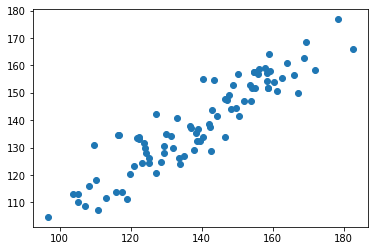

In [173]:
plt.scatter(nuevoYest,nuevoYhat)

In [174]:
clf.get_params

<bound method BaseEstimator.get_params of MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(24, 12, 6), learning_rate='constant',
             learning_rate_init=0.01, max_fun=15000, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=100, shuffle=True, solver='sgd', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)>